<a href="https://colab.research.google.com/github/etgins/046211_Deep_Learning/blob/main/ee046211_hw1_optimization_autograd_students.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <img src="https://img.icons8.com/bubbles/50/000000/mind-map.png" style="height:50px;display:inline"> EE 046211 - Technion - Deep Learning
---

## HW1 - Optimization and Automatic Differentiation
---

### <img src="https://img.icons8.com/clouds/96/000000/keyboard.png" style="height:50px;display:inline"> Keyboard Shortcuts
---
* Run current cell: **Ctrl + Enter**
* Run current cell and move to the next: **Shift + Enter**
* Show lines in a code cell: **Esc + L**
* View function documentation: **Shift + Tab** inside the parenthesis or `help(name_of_module)`
* New cell below: **Esc + B**
* Delete cell: **Esc + D, D** (two D's)

### <img src="https://img.icons8.com/bubbles/50/000000/information.png" style="height:50px;display:inline"> Students Information
---
* Fill in

|Name     |Campus Email| ID  |
|---------|--------------------------------|----------|
|Itamar Ginsberg| itamar.gi@campus.technion.ac.il| 312344245|
|Alon Nemirovsky| alon.nem@campus.technion.ac.il| 315802413|


### <img src="https://img.icons8.com/bubbles/50/000000/upload-to-cloud.png" style="height:50px;display:inline"> Submission Guidelines
---
* Maximal garde: 100.
* Submission only in **pairs**. 
    * Please make sure you have registered your group in Moodle (there is a group creation component on the Moodle where you need to create your group and assign members).
* **No handwritten submissions.** You can choose whether to answer in a Markdown cell in this notebook or attach a PDF with your answers.
* <a style='color:red'> SAVE THE NOTEBOOKS WITH THE OUTPUT, CODE CELLS THAT WERE NOT RUN WILL NOT GET ANY POINTS! </a>
* What you have to submit:
    * If you have answered the questions in the notebook, you should submit this file only, with the name: `ee046211_hw1_id1_id2.ipynb`.
    * If you answered the questionss in a different file you should submit a `.zip` file with the name `ee046211_hw1_id1_id2.zip` with content:
        * `ee046211_hw1_id1_id2.ipynb` - the code tasks
        * `ee046211_hw1_id1_id2.pdf` - answers to questions.
    * No other file-types (`.py`, `.docx`...) will be accepted.
* Submission on the course website (Moodle).
* **Latex in Colab** - in some cases, Latex equations may no be rendered. To avoid this, make sure to not use *bullets* in your answers ("* some text here with Latex equations" -> "some text here with Latex equations").

### <img src="https://img.icons8.com/dusk/64/000000/online.png" style="height:50px;display:inline"> Working Online and Locally
---
* You can choose your working environment:
    1. `Jupyter Notebook`, **locally** with <a href="https://www.anaconda.com/distribution/">Anaconda</a> or **online** on <a href="https://colab.research.google.com/">Google Colab</a>
        * Colab also supports running code on GPU, so if you don't have one, Colab is the way to go. To enable GPU on Colab, in the menu: `Runtime`$\rightarrow$ `Change Runtime Type` $\rightarrow$`GPU`.
    2. Python IDE such as <a href="https://www.jetbrains.com/pycharm/">PyCharm</a> or <a href="https://code.visualstudio.com/">Visual Studio Code</a>.
        * Both allow editing and running Jupyter Notebooks.

* Please refer to `Setting Up the Working Environment.pdf` on the Moodle or our GitHub (https://github.com/taldatech/ee046211-deep-learning) to help you get everything installed.
* If you need any technical assistance, please go to our Piazza forum (`hw1` folder) and describe your problem (preferably with images).

### <img src="https://img.icons8.com/bubbles/50/000000/checklist.png" style="height:50px;display:inline"> Agenda
---

* [Part 1 - Theory](#-Part-1---Theory)
    * [Q1 - Convergence of Gradient Descent](#-Question-1---Convergence-of-Gradient-Descent)
    * [Q2 - 1D Quadratic Optimization](#-Question-2---1D-Quadratic-Optimization)
    * [Q3 -Optimal Convergence Rate](#-Question-3---Optimal-Convergence-Rate)
    * [Q4 - Autodiff 1](#-Question-4----Automatic-Differentiation)
    * [Q5 - Autodiff 2](#-Question-5----Automatic-Differentiation-2)
* [Part 2 - Code Assignments](#-Part-2---Code-Assignments)
    * [Task 1 - The Beale Function](#-Task-1---The-Beale-Function)
    * [Task 2 - Building an Optimizer - Nesterov Momentum](#-Task-2---Building-an-Optimizer---Nesterov-Momentum)
    * [Task 3 - PyTorch Autograd](#-Task-3---PyTorch-Autograd)
    * [Task 4 - Low Rank Matrix Factorization](#-Task-4---Low-Rank-Matrix-Factorization)
* [Credits](#-Credits)

### <img src="https://img.icons8.com/cute-clipart/64/000000/ball-point-pen.png" style="height:50px;display:inline"> Part 1 - Theory
---
* You can choose whether to answser these straight in the notebook (Markdown + Latex) or use another editor (Word, LyX, Latex, Overleaf...) and submit an additional PDF file, **but no handwritten submissions**.
* You can attach additional figures (drawings, graphs,...) in a separate PDF file, just make sure to refer to them in your answers.

* $\large\LaTeX$ <a href="https://kapeli.com/cheat_sheets/LaTeX_Math_Symbols.docset/Contents/Resources/Documents/index">Cheat-Sheet</a> (to write equations)
    * <a href="http://tug.ctan.org/info/latex-refsheet/LaTeX_RefSheet.pdf">Another Cheat-Sheet</a>

## <img src="https://img.icons8.com/clouds/100/000000/question-mark.png" style="height:50px;display:inline"> Question 1 - Convergence of Gradient Descent
---
Recall from the lecture notes:

* **Definition**: A function $f$ is $\beta$-smooth if: $$ \forall w_1, w_2 \in \mathbb{R}^d: ||\nabla f(w_1) - \nabla f(w_2)|| \leq \beta ||w_1 -w_2|| $$
* **Lemma**: If $f$ is $\beta$-smooth then $$ f(w_1) -f(w_2) -\nabla f(w_2)^T (w_1-w_2) \leq \frac{\beta}{2} ||w_1-w_2||^2 $$

Prove the lemma.

Hints:
* Represent $f$ as an integral: $f(x) − f(y) = \int_0^1 \nabla f(y + t(x-y))^T(x-y) dt $
* Make use of Cauchy-Schwarz.

## <img src="https://img.icons8.com/clouds/100/000000/question-mark.png" style="height:50px;display:inline"> Question 2 - 1D Quadratic Optimization
---
We examine the following model: $$ f(w) = \frac{1}{2}\sum_{n=1}^N h_nw^2$$
The SGD update with batch size $M=1$: $$ w(t) = w(t-1) -\eta h_{n(t)}w(t-1) = (1-\eta h_{n(t)})w(t-1) $$
$n(t)$ sampled from $\{1,...,N\}$ **with replacement**.

We define: $$ h \triangleq \mathbb{E}h_{n(t)} = \frac{1}{N}\sum_{n=1}^Nh_n $$ $$ \rho \triangleq Var(h_{n(t)})= \frac{1}{N}\sum_{n=1}^Nh_n^2 -h^2$$


Show that:

1. $\mathbb{E}w(t) = (1-\eta h)\mathbb{E}w(t-1)$
2. $\mathbb{E}w^2(t) = ((1-\eta h)^2 +\eta^2 \rho)\mathbb{E}w^2(t-1)$

## <img src="https://img.icons8.com/clouds/100/000000/question-mark.png" style="height:50px;display:inline"> Question 3 - Optimal Convergence Rate
---
This question relates to slide ~26 in the Optimization lecture slides.

For an objective function $f(w) = \frac{1}{2}W^THW$ and $ H=X^TX=U\Lambda U^T $ where $\Lambda$ is the eigenvalue matrix with eigenvalues $\lambda_1 \leq \lambda_2 \leq...\leq \lambda_d$.

The Gradient Descent step as defined in the lecture: $$ w(t) = w(t-1) -\eta Hw(t-1). $$

For convenience, use $z(0) = U^Tw(0), z(t)=U^Tw(t)$.

Show that
1. $$ f(w(t)) = \frac{1}{2}\sum_{i=1}^d (1-\eta\lambda_i)^{2t}\lambda_iz_i^2(0)$$

2. $$ \mathrm{rate}(\eta) = \max (|1-\eta\lambda_{min}|, |1-\eta\lambda_{max}|) $$ (you can explain in words why it is true).
3. $$ \eta_{\mathrm{optimal}} = arg\min_{\eta}\mathrm{rate}(\eta) = \frac{2}{\lambda_{max} + \lambda_{min}} $$
4. $$R_{\mathrm{optimal}} = \min_{\eta}rate(\eta) = \frac{\lambda_{max}/ \lambda_{min} - 1}{\lambda_{max} / \lambda_{min} + 1} = \kappa \text{(condition number)} $$

## <img src="https://img.icons8.com/clouds/100/000000/question-mark.png" style="height:50px;display:inline"> Question 4 -  Automatic Differentiation
---

Consider the scalar function: $$ f = \exp(\exp(x) + \exp(x)^2) +\sin(\exp(x) + \exp(x)^2) $$

1. Write down the derivative w.r.t. $x$ explicitly, i.e., $\frac{d f}{d x}$
2. We define the following intermediate variables: $$ a = \exp(x) $$ $$ b=a^2 $$ $$ c = a+b $$ $$ d=\exp(c) $$ $$ e=\sin(c) $$ $$ f=d+e $$ Draw a graph picturing the relationship between all variables (called the **computation graph**).
3. Using the graph, write down the derivatives of the individual terms, working backwards to compute the derivative of $f$ (i.e., write down the derivatives $\frac{df}{dd}, \frac{df}{de}, ..., \frac{df}{dx}$)

## <img src="https://img.icons8.com/clouds/100/000000/question-mark.png" style="height:50px;display:inline"> Question 5 -  Automatic Differentiation 2
---
Write down the chain rule in the dual numbers representation for the following: $$ f(g(h(x + \epsilon x'))) $$ What is $ \frac{df(x)}{dx} $?

### <img src="https://img.icons8.com/officel/80/000000/code.png" style="height:50px;display:inline"> Part 2 - Code Assignments
---
* You must write your code in this notebook and save it with the output of aall of the code cells.
* Additional text can be added in Markdown cells.
* You can use any other IDE you like (PyCharm, VSCode...) to write/debug your code, but for the submission you must copy it to this notebook, run the code and save the notebook with the output.

In [ ]:
# imports for the practice (you can add more if you need)
import os
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm
from sklearn.datasets import load_iris
seed = 211
np.random.seed(seed)
torch.manual_seed(seed)
# %matplotlib notebook
%matplotlib inline

### <img src="https://img.icons8.com/color/48/000000/code.png" style="height:50px;display:inline"> Task 1 - The Beale Function
---
The Beale function is defined as follows: $$ f(x, y) = (1.5 - x + xy)^{2} + (2.25 - x + xy^{2})^{2} + (2.625 - x +xy^{3})^{2}$$

1. What is the global minima of this function?
2. Implement the Beale function: `beale_f(x,y)`.
3. Implement a function, `beale_grads(x,y)` that returns the gradients of the Beale function.
4. 3D plot the Beale function wit the global minima you found. Use Matplotlib's `ax.plot_surface(x_mesh, y_mesh, z, norm=LogNorm(), rstride=1, cstride=1, edgecolor='none', alpha=.8, cmap=plt.cm.jet)` for the function, and `ax.plot(x, y, f(x, y), 'r*', markersize=20)` for the minima.
4. 2D plot the contours with `ax.contour(x_mesh, y_mesh, z, levels=np.logspace(-.5, 5, 35), norm=LogNorm(), cmap=plt.cm.jet)` and the minima with `ax.plot(x, y, 'r*', markersize=20)`.

Your Answers Here

In [ ]:
# Set the manually calculated minima
min_x = 3
min_y = 0.5

def beale_f(x, y):
    value = None
    value = (1.5-x+x*y)**2+(2.25-x+x*y**2)**2+(2.625-x+x*y**3)**2
    return value

def beale_grads(x, y):
    dx, dy = None, None
    dx = 2*(1.5-x+x*y)*(-1+y) + 2*(2.25-x+x*y**2)*(-1+y**2) + 2*(2.625-x+x*y**3)*(-1+y**3)
    dy = 2*(1.5-x+x*y)*x + 2*(2.25-x+x*y**2)*(2*y*x) + 2*(2.625-x+x*y**3)*(x*3*y**2)
    grads = np.array([dx, dy])
    return grads

In [ ]:
minima = np.array([min_x, min_y])
beale_res = beale_f(*minima)
grads_res = beale_grads(*minima)
print(f"minima (1x2 row vector shape): {minima}")
print(f"beale_f output: {beale_res}")
print(f"beale_grad output: {grads_res}")

minima (1x2 row vector shape): [3.  0.5]
beale_f output: 0.0
beale_grad output: [-0.  0.]


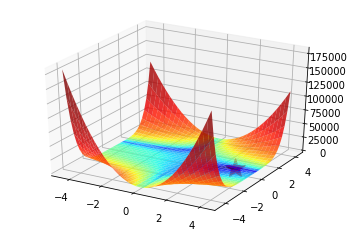

In [ ]:
x = np.arange(-4.5, 4.5, 0.25)
y = np.arange(-4.5, 4.5, 0.25)
x_mesh, y_mesh = np.meshgrid(x, y)
z = beale_f(x_mesh,y_mesh)
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(x_mesh, y_mesh, z, norm=LogNorm(), rstride=1, cstride=1, edgecolor='none', alpha=.8, cmap=plt.cm.jet)
minima_x = np.array([min_x])
minima_y = np.array([min_y])
ax.plot(minima_x, minima_y, beale_f(minima_x, minima_y), 'r*', markersize=20)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Log scale: values of z <= 0 have been masked
  


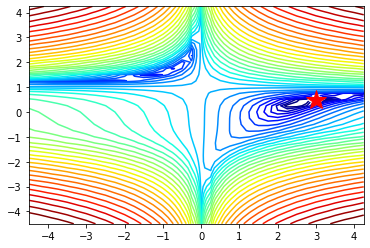

In [ ]:
fig1 = plt.figure()
plt.contour(x_mesh, y_mesh, beale_f(x_mesh,y_mesh), levels=np.logspace(-.5, 5, 35), norm=LogNorm(), cmap=plt.cm.jet)
plt.plot(minima_x, minima_y, 'r*', markersize=20)

### <img src="https://img.icons8.com/color/48/000000/code.png" style="height:50px;display:inline"> Task 2 - Building an Optimizer - Nesterov Momentum
---
In this task, you are going to implement the Nesterov Momentum optimizer. We are giving the skeleton of the code and the description of the methods, and you need to implement the optimizer.

Recall the Nesterov Momentum update rule:
$$ z^{k+1} = \beta z^k -\alpha \nabla f(w^k +\beta z^k) $$ $$ w^{k+1} = w^k + z^{k+1} $$

1. Implement `class NesterovMomentumOptimizer()`. 
    * `function` is the Python function you want to optimize.
    * `gradients` is the Python function that returns the gradients of `function`.
    * `x_init` and `y_init` are the initialization points for the optimizer.
    * Save the `path` of the optimizer (the minima points the optimizer visits during the optimization).
    * Stopping criterion: change in minima `<1e-7`.
    * **You can change the class however you wish, you can remove/add varaibles and methods as you wish**
2. For ` x_init=0.7, y_init=1.4, learning_rate=0.01, momentum=0.9`, optimize the Beale function. Plot the results **with the path taken** (better do it on the 2D contour plot).
3. Choose different initialization and learning rate and show the results as in 2.

In [ ]:
class NesterovMomentumOptimizer():
    def __init__(self, function, gradients, x_init=None, y_init=None, learning_rate=0.01, momentum=0.9):
        self.f = function
        self.g = gradients
        scale = 3.0
        self.path = None
        self.current_val = np.zeros([2])
        if x_init is not None:
            self.current_val[0] = x_init
        else:
            self.current_val[0] = np.random.uniform(low=-scale, high=scale)
            print("x_init: {:.3f}".format(self.curernt_val[0]))
        if y_init is not None:
            self.current_val[1] = y_init
        else:
            self.current_val[1] = np.random.uniform(low=-scale, high=scale)
        print("x_init: {:.3f}".format(self.current_val[0]))
        print("y_init: {:.3f}".format(self.current_val[1]))

        self.lr = learning_rate
        self.momentum = momentum
        self.velocity = np.zeros([2])
    
        # for accumulation of loss and path
        self.z_history = []
        self.x_history = []
        self.y_history = []
  
  
    def func(self, x, y):
        """Beale function.

        Args:
          variables: input data, shape: 1-rank Tensor (vector) np.array
            x: x-dimension of inputs
            y: y-dimension of inputs

        Returns:
          z: Beale function value at (x, y)
        """
        z = (1.5-x+x*y)**2+(2.25-x+x*y**2)**2+(2.625-x+x*y**3)**2
        return z
  
    def gradients(self, x ,y):
        """Gradient of Beale function.

        Args:
          variables: input data, shape: 1-rank Tensor (vector) np.array
            x: x-dimension of inputs
            y: y-dimension of inputs

        Returns:
          grads: [dx, dy], shape: 1-rank Tensor (vector) np.array
            dx: gradient of Beale function with respect to x-dimension of inputs
            dy: gradient of Beale function with respect to y-dimension of inputs
        """
        dx = 2*(1.5-x+x*y)*(-1+y) + 2*(2.25-x+x*y**2)*(-1+y**2) + 2*(2.625-x+x*y**3)*(-1+y**3)
        dy = 2*(1.5-x+x*y)*x + 2*(2.25-x+x*y**2)*(2*y*x) + 2*(2.625-x+x*y**3)*(x*3*y**2)
        grads = np.array([dx, dy])
        return grads
      
    def weights_update(self):
        """Weights update using Nesterov Momentum.

          v' = gamma * v - lr * grads
          w' = w + v
        """
        
        x, y = self.current_val
        velocity_x, velocity_y = self.velocity
        x_update = x + velocity_x*self.momentum
        y_update = y + velocity_y*self.momentum

        grads = self.gradients(x_update, y_update)

        self.velocity = self.momentum * self.velocity - self.lr * grads
        self.current_val = self.current_val + self.velocity
    
    def history_update(self, z, x, y):
        """Accumulate all interesting variables, z = function(x,y)
        """
        self.x_history.append(x)
        self.y_history.append(y)
        self.z_history.append(z)
    
    
    def train(self, max_steps):
        """
        Optimize the function using Nesterov Momentum
        """
        steps = 0

        x1, y1 = self.current_val
        z1 = self.func(x1,y1)
        self.history_update(z1, x1, y1)
        
        self.weights_update()
        x2, y2 =self.current_val
        z2 = self.func(x2, y2)
        self.history_update(z2, x2, y2)
        steps = steps + 1

        while((steps < max_steps) and (abs(z2-z1)>=1e-7)):
          z1 = z2
          self.weights_update()
          x2, y2 =self.current_val
          z2 = self.func(x2, y2)
          self.history_update(z2, x2, y2)
          steps = steps + 1


    @property
    def x(self):
        return self.current_val[0]
  
    @property
    def y(self):
        return self.current_val[1]       

In [ ]:
# 2.
opt = NesterovMomentumOptimizer(beale_f, beale_grads, x_init=0.7, y_init=1.4, learning_rate=0.01, momentum=0.9)

x_init: 0.700
y_init: 1.400


In [ ]:
%time
opt.train(1000)
print("Global minima")
print("x*: {:.2f}  y*: {:.2f}".format(minima[0], minima[1]))
print("Solution using the gradient descent")
print("x: {:.4f}  y: {:.4f}".format(opt.x, opt.y))

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.48 µs
Global minima
x*: 3.00  y*: 0.50
Solution using the gradient descent
x: 3.0023  y: 0.5006


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Log scale: values of z <= 0 have been masked
  


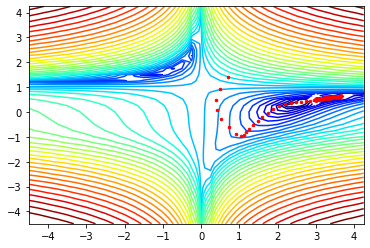

In [ ]:
fig1 = plt.figure()
plt.contour(x_mesh, y_mesh, beale_f(x_mesh,y_mesh), levels=np.logspace(-.5, 5, 35), norm=LogNorm(), cmap=plt.cm.jet)
plt.plot(opt.x_history, opt.y_history, 'r.', markersize=5)

x_init: -2.000
y_init: -1.000
CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 6.2 µs
Global minima
x*: 3.00  y*: 0.50
Solution using the gradient descent
x: 2.9945  y: 0.4986


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: Log scale: values of z <= 0 have been masked
  from ipykernel import kernelapp as app


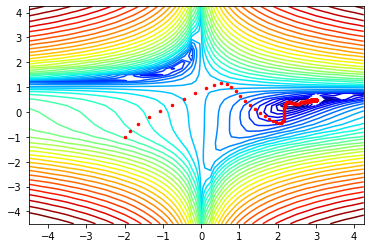

In [ ]:
# different initialization:
x_init3 = 1
y_init3 = 4

opt3 = NesterovMomentumOptimizer(beale_f, beale_grads, x_init=-2, y_init=-1, learning_rate=0.003, momentum=0.9)

%time
opt3.train(1000)
print("Global minima")
print("x*: {:.2f}  y*: {:.2f}".format(minima[0], minima[1]))
print("Solution using the gradient descent")
print("x: {:.4f}  y: {:.4f}".format(opt3.x, opt3.y))

fig3 = plt.figure()
plt.contour(x_mesh, y_mesh, beale_f(x_mesh,y_mesh), levels=np.logspace(-.5, 5, 35), norm=LogNorm(), cmap=plt.cm.jet)
plt.plot(opt3.x_history, opt3.y_history, 'r.', markersize=5)

### <img src="https://img.icons8.com/color/48/000000/code.png" style="height:50px;display:inline"> Task 3 - PyTorch Autograd
---
For the function from the theory practice: $$ f = \exp(\exp(x) + \exp(x)^2) +\sin(\exp(x) + \exp(x)^2)  $$

1. Implement it and its dervative (explicitly) using `torch`.
2. Define a scalar tensor `x` and use `autograd` to calculate the derivative w.r.t $x$. Does the result correspond to the output of the function the calculates the derivative explicitly?

In [ ]:
def f(x):
    f_val = None
    f_val = torch.exp(torch.exp(x) + torch.exp(2*x)) + torch.sin(torch.exp(x) + torch.exp(2*x))
    return f_val

def derv_f(x):
    derv_val = None
    derv_val = torch.exp(x) * (2*torch.exp(x)+1) * (torch.cos(torch.exp(x) + (torch.exp(2*x))) + torch.exp(torch.exp(x) + (torch.exp(2*x))) )
    return derv_val

In [ ]:
x = torch.tensor(0.5, requires_grad=True)
print(x)
f_res = f(x)
f_manual_grad = derv_f(x.detach()) 

# Calculate with torch autograd
# f_autograd = None
f_res.backward()
f_autograd = x.grad


print(f_manual_grad)
print(f_autograd)

tensor(0.5000, requires_grad=True)
tensor(555.9719)
tensor(555.9719)


### <img src="https://img.icons8.com/color/48/000000/code.png" style="height:50px;display:inline"> Task 4 - Low Rank Matrix Factorization 
---
Consider the following optimization problem: $$ \min_{\hat{U}, \hat{V}}||A - \hat{U}\hat{V}||_F^{2} $$ Where $A \in \mathcal{R}^{m \times n},\hat{U} \in \mathcal{R}^{m \times r}, \hat{V} \in \mathcal{R}^{r \times n} $ and $r < min(m,n)$ ($r$ is the rank of the matrix). $||\cdot||_F^2$ denotes the Frobenius norm.

1. Implement a function, `gd_factorize_ad(A, rank, num_epochs=1000, lr=0.01)`, that given a 2D tensor `A` and a `rank`, will calculate the low-rank factorization of `A` using **gradient decsent**. Compute and apply all the gradients of $\hat{U}$ and of $\hat{V}$ once per epoch. $\hat{U}$ and $\hat{V}$ should be initially created with uniform random values. Use PyTorch's `autograd` for the gradients.
    * To compute the squared Frobenius norm loss (reconstruction loss), use `torch.nn.functional.mse loss with reduction=’sum’`.

2. Use the provided `data` of the Iris dataset of 150 instances and 4 features. Apply `gd_factorize_ad` to compute the 2-rank matrix factorization of `data`. What is the reconstruction loss?

In [ ]:
# df = load_iris(as_frame=True).data # option 1
# # df = pd.read_csv('./iris.data', header=None) # option 2
# data = torch.tensor(df.iloc[:, [0, 1, 2, 3]].values)
# data = data - data.mean(dim=0)

df_temp = load_iris()
df = pd.DataFrame(df_temp.data, columns=df_temp.feature_names)
data = torch.tensor(df.iloc[:, [0, 1, 2, 3]].values)
data = data - data.mean(dim=0)

In [ ]:
def gd_factorize_ad(A, rank, num_epochs=1000, lr=0.01):
    # initialize
    U = None
    V = None
    
    U = torch.rand(A.size(dim=0), rank)
    U.requires_grad=True
    V = torch.rand(rank, A.size(dim=1))
    V.requires_grad=True
    
    # implement gradient descent
    for epoch in range(num_epochs):
        loss = None
        loss = torch.nn.functional.mse_loss(A, torch.mm(U,V), reduction= 'sum')
        loss.backward()
        if epoch % 5 == 0:
            print(f'epoch: {epoch}, loss: {loss}')
        
        
        with torch.no_grad():
          U -= lr*U.grad
          V -= lr*V.grad

          U.grad = None
          V.grad = None

    return U, V

In [ ]:
U, V = gd_factorize_ad(data.float(), rank=2, num_epochs=1000, lr=0.01)

epoch: 0, loss: 888.7950439453125
epoch: 5, loss: 531.0764770507812
epoch: 10, loss: 72.6485824584961
epoch: 15, loss: 51.54425811767578
epoch: 20, loss: 51.36109924316406
epoch: 25, loss: 51.35871124267578
epoch: 30, loss: 51.358497619628906
epoch: 35, loss: 51.358375549316406
epoch: 40, loss: 51.3582649230957
epoch: 45, loss: 51.35813522338867
epoch: 50, loss: 51.358009338378906
epoch: 55, loss: 51.35786437988281
epoch: 60, loss: 51.35771560668945
epoch: 65, loss: 51.3575439453125
epoch: 70, loss: 51.35737609863281
epoch: 75, loss: 51.35718536376953
epoch: 80, loss: 51.35697937011719
epoch: 85, loss: 51.35675811767578
epoch: 90, loss: 51.35651397705078
epoch: 95, loss: 51.35626220703125
epoch: 100, loss: 51.35597229003906
epoch: 105, loss: 51.35566329956055
epoch: 110, loss: 51.35532760620117
epoch: 115, loss: 51.35496520996094
epoch: 120, loss: 51.35456466674805
epoch: 125, loss: 51.354129791259766
epoch: 130, loss: 51.35364532470703
epoch: 135, loss: 51.35313415527344
epoch: 140, l

## <img src="https://img.icons8.com/dusk/64/000000/prize.png" style="height:50px;display:inline"> Credits
---
* Icons made by <a href="https://www.flaticon.com/authors/becris" title="Becris">Becris</a> from <a href="https://www.flaticon.com/" title="Flaticon">www.flaticon.com</a>
* Icons from <a href="https://icons8.com/">Icons8.com</a> - https://icons8.com
* Datasets from <a href="https://www.kaggle.com/">Kaggle</a> - https://www.kaggle.com/